In [9]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/hilal/Downloads/diabetes (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows and dataset info for exploration
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 None)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import numpy as np

# Separate features and target
X = data.drop(columns="Outcome")
y = data["Outcome"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN model with an initial k value
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, recall, precision, f1, conf_matrix

(0.6623376623376623,
 0.5818181818181818,
 0.5245901639344263,
 0.5517241379310345,
 array([[70, 29],
        [23, 32]], dtype=int64))

In [21]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# Set up GridSearchCV to find the best k value
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best k value and cross-validation score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

cv_scores, best_k, best_score

(array([0.72727273, 0.72727273, 0.7012987 , 0.75816993, 0.70588235]),
 14,
 0.7578558696205755)

Model Performance Metrics:


,Metric,Score
0,Accuracy,0.662338
1,Recall,0.581818
2,Precision,0.524590
3,F1 Score,0.551724


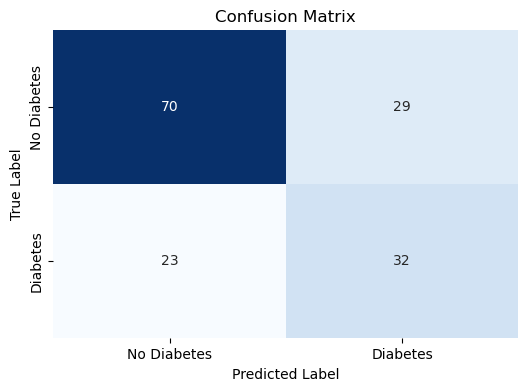

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Score": [accuracy, recall, precision, f1]
})

# Display the metrics table
print("Model Performance Metrics:")
display(metrics_df)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

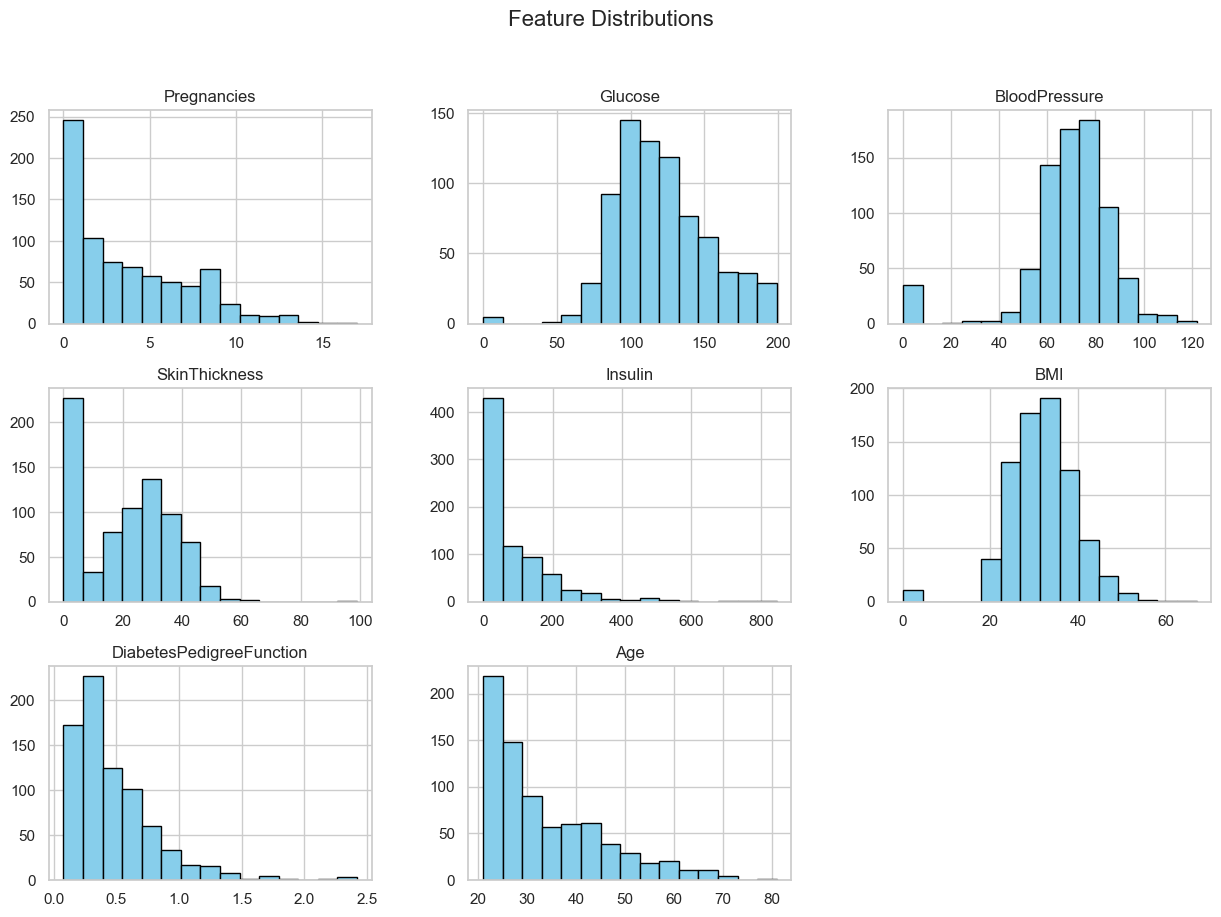

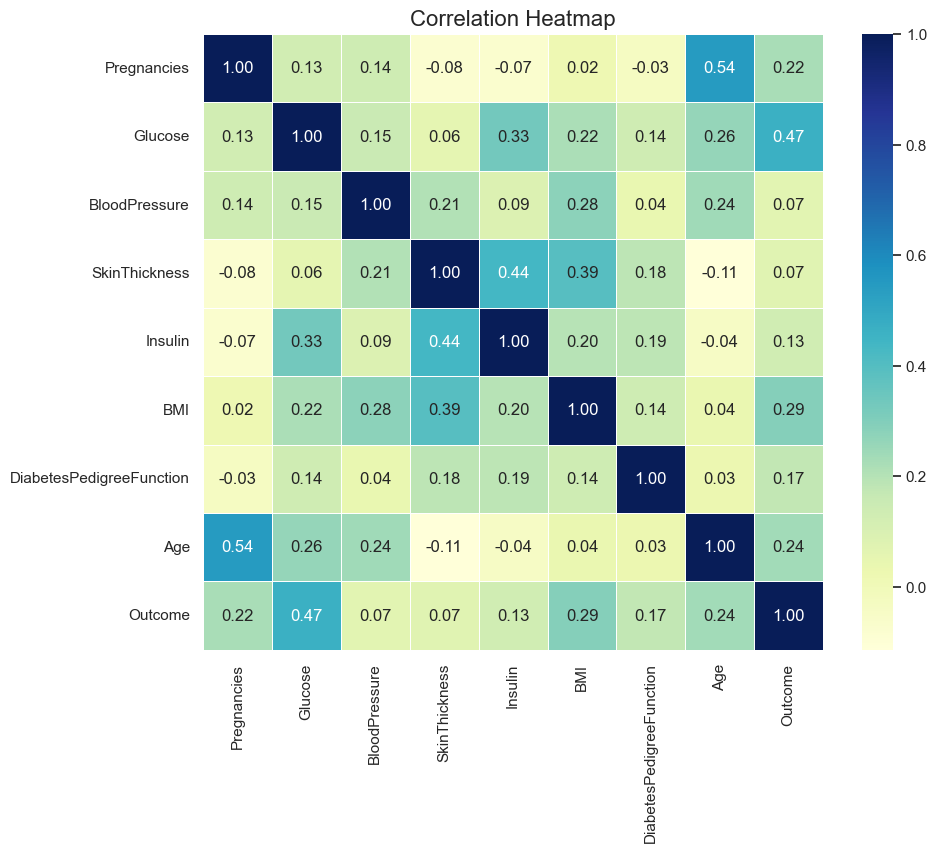

Model Performance Metrics:


,Metric,Score
0,Accuracy,0.662338
1,Recall,0.581818
2,Precision,0.524590
3,F1 Score,0.551724


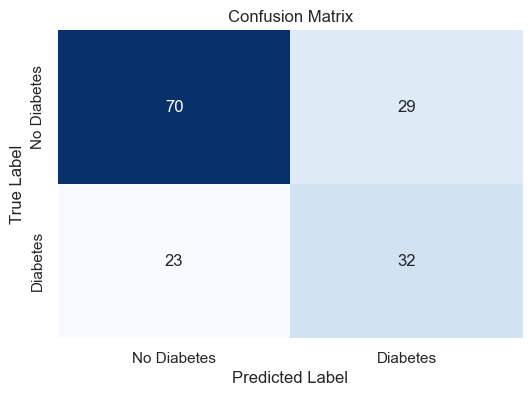

Cross-Validation Scores: [0.72727273 0.72727273 0.7012987  0.75816993 0.70588235]
Mean CV Accuracy: 0.723979288685171
Best k value: 14
Best cross-validation accuracy: 0.7578558696205755


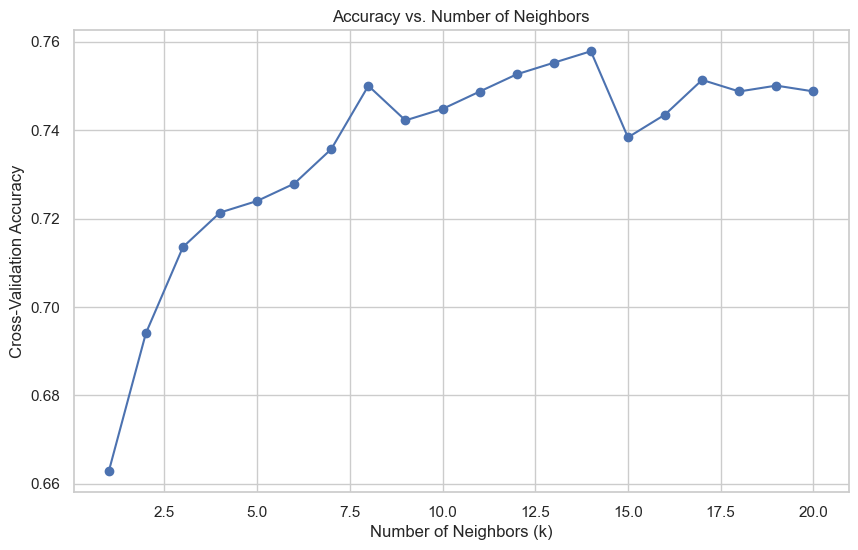

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Load the dataset
file_path = 'C:/Users/hilal/Downloads/diabetes (1).csv'
data = pd.read_csv(file_path)

# Step 1: Explore and visualize the dataset
# Plot histograms for each feature
sns.set(style="whitegrid")
data.drop(columns="Outcome").hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Step 2: Create a KNN model and assess its performance
# Separate features and target
X = data.drop(columns="Outcome")
y = data["Outcome"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN model with an initial k value
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the metrics in a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Score": [accuracy, recall, precision, f1]
})

print("Model Performance Metrics:")
display(metrics_df)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Step 3: Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Step 4: Tune the model with GridSearchCV for optimal k value
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best k value and score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k value: {best_k}")
print(f"Best cross-validation accuracy: {best_score}")

# Step 5: Plot accuracy vs. number of neighbors
k_values = np.arange(1, 21)
cv_accuracies = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=5, scoring='accuracy').mean() for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_accuracies, marker='o', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Accuracy vs. Number of Neighbors")
plt.grid(True)
plt.show()